In [123]:
import networkx as nx
from networkx.algorithms import bipartite
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib notebook

# Read and plot a network

dict_keys(['Vincent', 'Frida', 'Lee', 'Georgia', 'Claude', 'Pablo', 'Andy', 'Joan'])


<IPython.core.display.Javascript object>


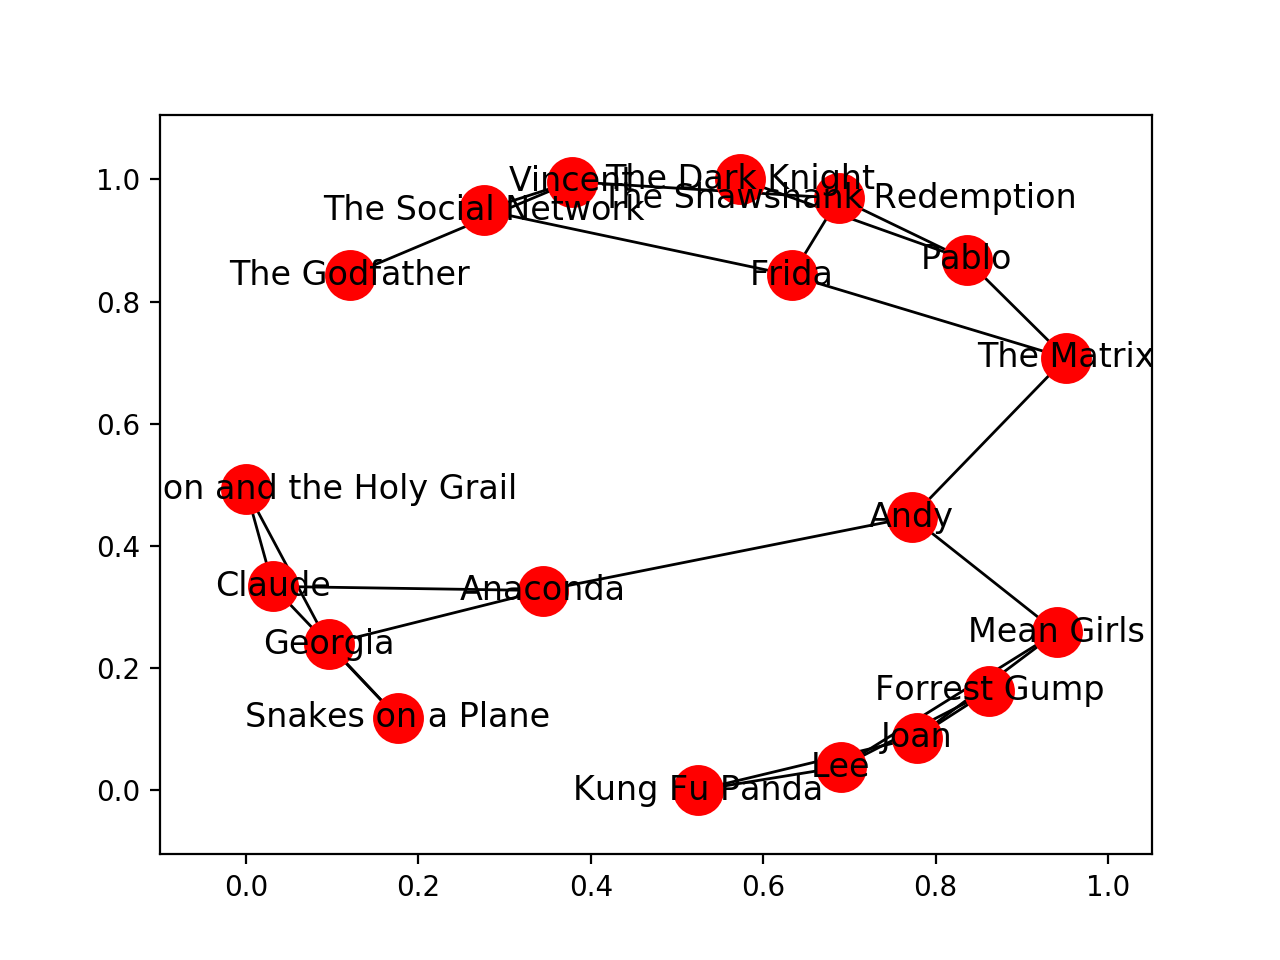

<IPython.core.display.Javascript object>


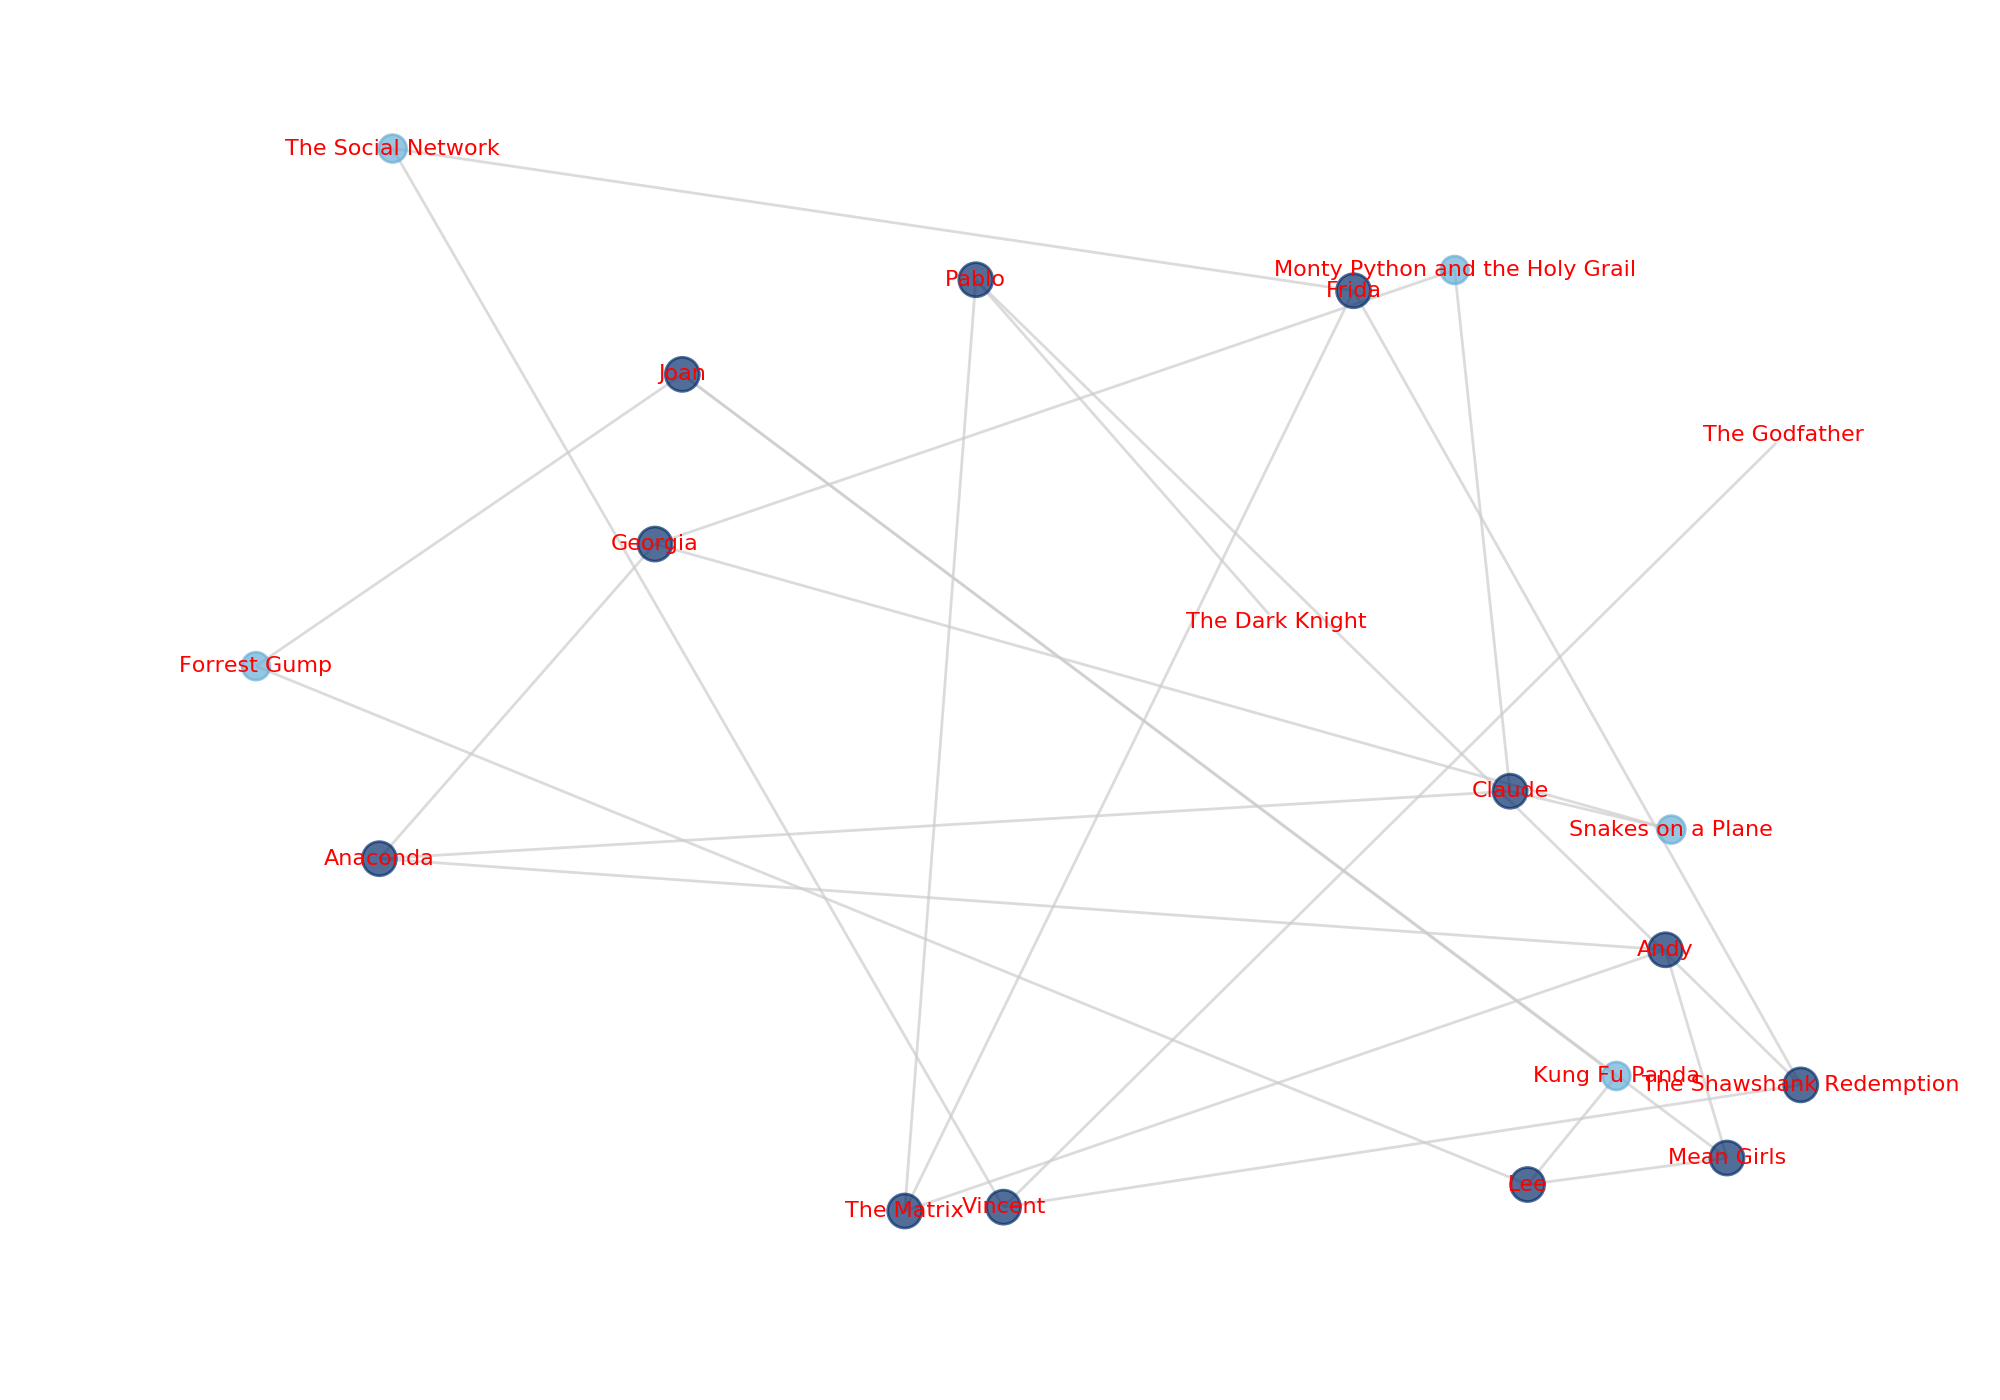

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 2, 2, 2, 1, 1]
[150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 100, 100, 150, 100, 100, 100, 50, 50]


In [124]:
#Read from file
#create a bipartite graph based on 2 columns
A=pd.read_csv('data/Employee.txt',delimiter='\t')
A.head()
B=nx.Graph()
B.add_nodes_from(A['#Employee'],bipartite=0)
B.add_nodes_from(A['Movie'],bipartite=1)
B.add_edges_from(
    [(row['#Employee'], row['Movie']) for idx, row in A.iterrows()])
# add node attributes
len(B.nodes())
len(B.edges())
B.edges(data=True)
dic1={}; dic2={}
for i in bipartite.sets(B) [0]:
    dic1[i]='employee'
for i in bipartite.sets(B) [1]:
    dic2[i]='movie'

print (dic1.keys())
nx.set_node_attributes(B,'type',dic1)
nx.set_node_attributes(B,'type',dic2)

B.edges(data=True)
nx.get_node_attributes(B,'type')


#visualization
nx.draw_networkx(B)
plt.figure(figsize=(10,7))
pos = nx.random_layout(B)
#nx.draw_networkx(B, pos, alpha=0.7, with_labels=True, edge_color='.4')
node_color = [B.degree(v) for v in B]
print (node_color)
node_size = [50*B.degree(v) for v in B]
#edge_width = [0.5*B[u][v]['weight'] for u,v in B.edges()]

print (node_size)
nx.draw_networkx(B, pos, node_size=node_size, 
                 node_color=node_color, alpha=0.9, with_labels=True,
                 edge_color='.8', cmap=plt.cm.Blues,font_size=8, font_color='r')

plt.axis('off')
plt.tight_layout();

# Basic network properties

[('F', 'A'), ('F', 'C'), ('E', 'A'), ('E', 'C'), ('D', 'B'), ('A', 'C')]

2

<IPython.core.display.Javascript object>


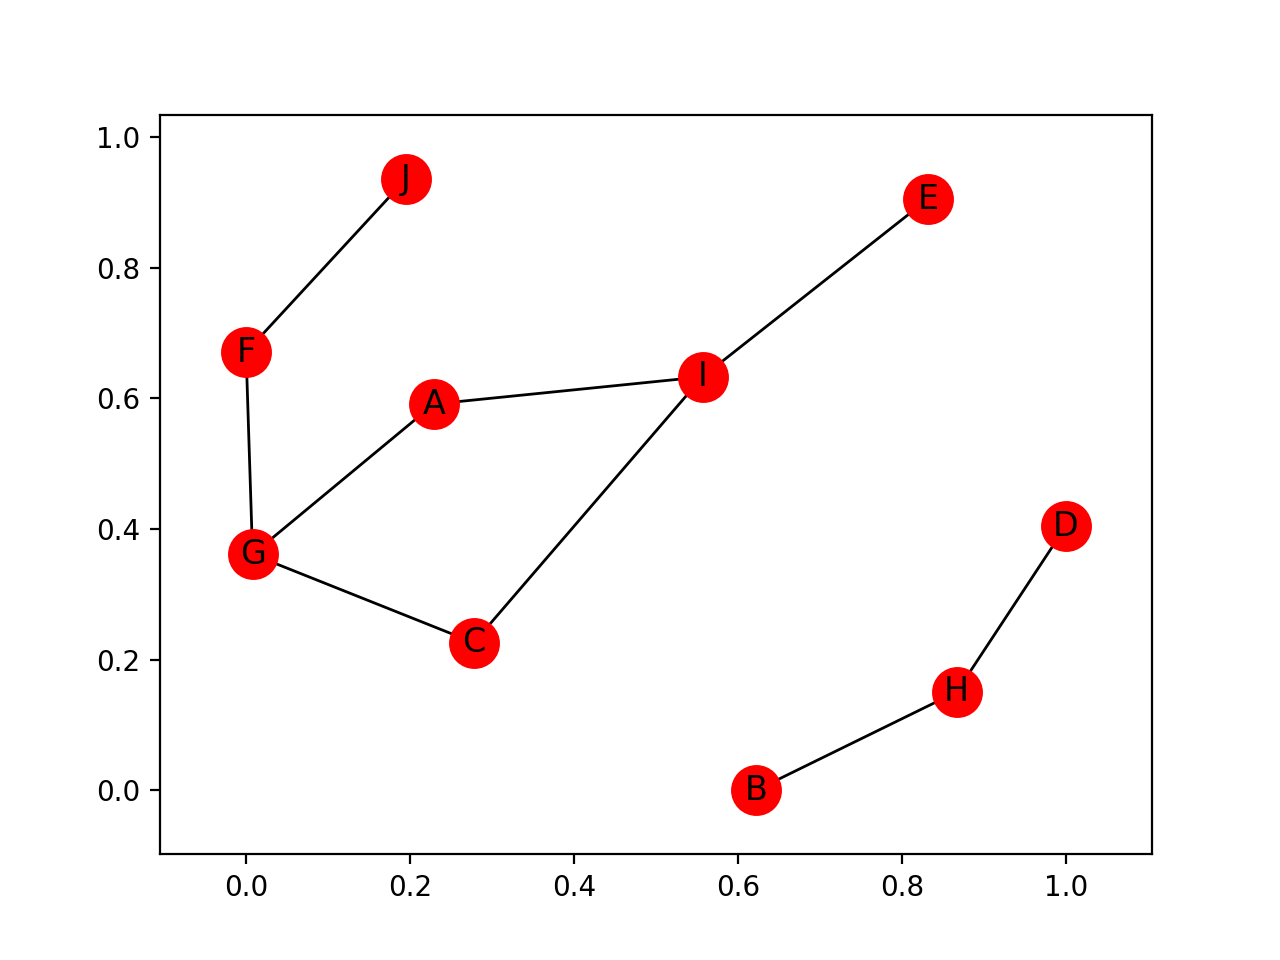

In [126]:
# example projections
B = nx.Graph()
B.add_edges_from([('A', 'G'),('A','I'), ('B','H'), ('C', 'G'), ('C', 'I'),('D', 'H'), ('E', 'I'), ('F', 'G'), ('F', 'J')])
X1 = set(['A', 'B', 'C', 'D', 'E', 'F'])
P=bipartite.weighted_projected_graph(B,X1)
P.edges()
P['A']['C']['weight']
nx.draw_networkx(B)


In [49]:
X=set()
for i in dic1.keys():
    X.add(i)
print (X)
P=bipartite.weighted_projected_graph(B,X)
P.edges()
P.nodes()
P['Vincent']
nx.draw_networkx(P)

{'Vincent', 'Georgia', 'Lee', 'Claude', 'Pablo', 'Joan', 'Andy', 'Frida'}


In [63]:
G=nx.karate_club_graph()
nx.convert_node_labels_to_integers(G,first_label=1)
nx.radius(G)
nx.diameter(G)
nx.center(G)
nx.periphery(G)

3

5

[0, 1, 2, 3, 8, 13, 19, 31]

[14, 15, 16, 18, 20, 22, 23, 26, 29]

# Connnected Components

In [77]:
G = nx.path_graph(4)
nx.draw_networkx(G)
G.add_edge(5,6)
list(nx.connected_component_subgraphs(G))
print (G.nodes())
print (G.edges())

[0, 1, 2, 3, 5, 6]
[(0, 1), (1, 2), (2, 3), (5, 6)]


In [127]:
B=pd.read_csv('email_network.txt',delimiter='\t')
B.head()
B.columns
C=nx.MultiDiGraph()
#B['time'].value_counts()
C.add_edges_from(
    [(row['#Sender'], row['Recipient']) for idx, row in B.iterrows()])

len(C.nodes()); len(C.edges())

nx.is_strongly_connected(C)
nx.is_weakly_connected(C)
len(sorted(nx.weakly_connected_components(C))[0])
for i in sorted(nx.strongly_connected_components(C)):
    print (i, len(i))
 
for i in sorted(nx.weakly_connected_components(C)):
    print (i, len(i))


,#Sender,Recipient,time
0,1,2,1262454010
1,1,3,1262454010
2,1,4,1262454010
3,1,5,1262454010
4,1,6,1262454010


Index(['#Sender', 'Recipient', 'time'], dtype='object')

167

82927

False

True

167

{116} 1
{130} 1
{133} 1
{125} 1
{102} 1
{126} 1
{136} 1
{114} 1
{127} 1
{131} 1
{132} 1
{135} 1
{166} 1
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 115, 117, 118, 119, 120, 121, 122, 123, 124, 128, 129, 134, 149, 151} 126
{137} 1
{138} 1
{139} 1
{140} 1
{141} 1
{142} 1
{143} 1
{144} 1
{145} 1
{146} 1
{147} 1
{148} 1
{150} 1
{152} 1
{153} 1
{154} 1
{155} 1
{156} 1
{157} 1
{158} 1
{159} 1
{160} 1
{161} 1
{162} 1
{163} 1
{164} 1
{165} 1
{167} 1
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 3

In [128]:
G_sc = [x for x in nx.strongly_connected_component_subgraphs(C) if len(x)>1]
nx.average_shortest_path_length(G_sc[0])
nx.diameter(G_sc[0])
E=[i for i,j in nx.eccentricity(G_sc[0]).items() if j == nx.diameter(G_sc[0])]   
print (E)
F=[i for i,j in nx.eccentricity(G_sc[0]).items() if j == nx.radius(G_sc[0])]   
print (F)

1.6461587301587302

3

[97, 129, 134]
[38]


In [96]:
G = nx.DiGraph()
G.add_edges_from([('A', 'B'), ('C', 'A'), ('A', 'E'), ('G', 'A'), ('A', 'N'), ('B', 'C'), ('D', 'B'), ('B', 'E'), ('C', 'D'), ('E', 'C'), ('D', 'E'), ('E', 'D'), ('F', 'G'), ('I', 'F'), ('J', 'F'), 
('H', 'G'), ('I', 'G'), ('G', 'J'), ('I', 'H'), ('H', 'I'), ('I', 'J'), ('J', 'O'), ('O', 'J'), ('K', 'M'), ('K', 'L'), ('O', 'K'), ('O', 'L'), ('N', 'L'), ('L', 'M'), ('N', 'O')])
sorted(nx.all_simple_paths(G,'A','E'))
#min number of nodes needed to disconnect a graph or a pair of nodes
nx.node_connectivity(G,'A','E')
nx.minimum_node_cut(G,'A','E')
#min number of edges to disconnect a graph or a path
nx.edge_connectivity(G,'A','E')
nx.minimum_edge_cut(G,'A','E')


[['A', 'B', 'C', 'D', 'E'], ['A', 'B', 'E'], ['A', 'E']]

2

{'B'}

2

{('A', 'B'), ('A', 'E')}

<IPython.core.display.Javascript object>


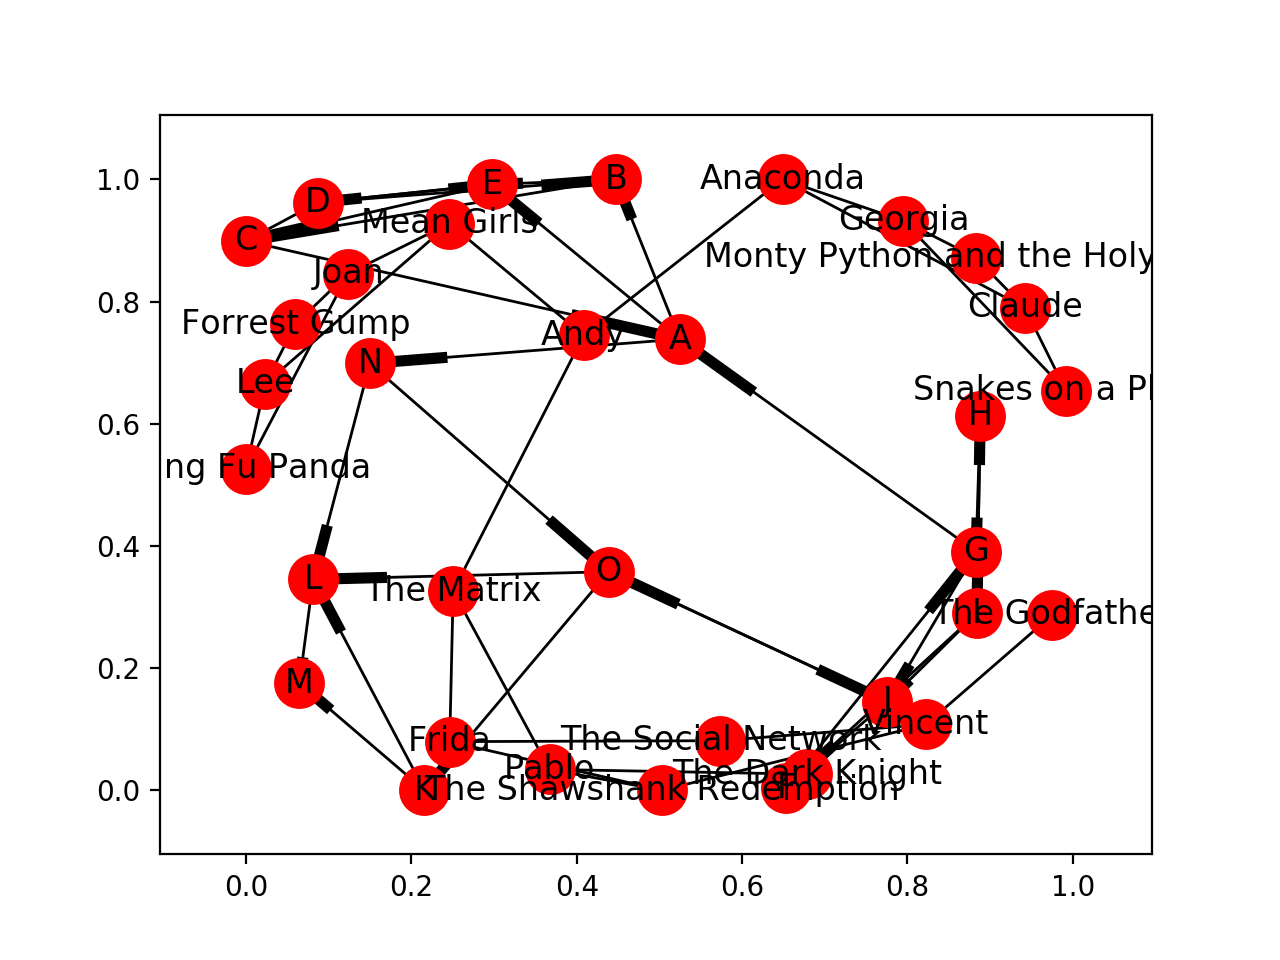

In [91]:
#check results by visualizing the graph
nx.draw_networkx(G)
